<a href="https://colab.research.google.com/github/Malikshemi3344/datascienceproject/blob/main/datascience_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creditcard fraud detection**

In [23]:
import numpy as np  # For numerical computations and handling arrays
import pandas as pd  # For data manipulation and analysis

# For creating and plotting the correlation matrix
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
from matplotlib import gridspec  # For creating complex grid layouts for plots

import kagglehub  # For downloading datasets from Kaggle

from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets by oversampling the minority class
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.linear_model import LogisticRegression  # For applying logistic regression models
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc  # For evaluating model performance
from sklearn.preprocessing import StandardScaler  # For standardizing features by scaling them
from sklearn.metrics import precision_recall_curve  # For plotting precision-recall curves
from sklearn.metrics import precision_score, recall_score, f1_score  # For calculating precision, recall, and F1 score
from sklearn.calibration import calibration_curve  # For assessing how well predicted probabilities match actual outcomes
import joblib  # For saving and loading models to/from disk
from sklearn.ensemble import RandomForestClassifier  # For creating ensemble models using random forests
from sklearn.model_selection import learning_curve  # For evaluating model performance over different training set sizes
import seaborn as sns  # For creating attractive and informative statistical graphics

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Loading the data and understanding it

In [2]:
#download the dataset and import the csv file using pandas
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
data_frame = pd.read_csv(f"{path}/creditcard.csv")
#print some data to analyze
print(data_frame.head)

100%|██████████| 66.0M/66.0M [00:01<00:00, 44.2MB/s]

Extracting files...


<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
data_frame.shape

(284807, 31)

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data_frame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((data_frame.isnull().sum()/len(data_frame.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [7]:
classes = data_frame['Class'].value_counts()
classes

,count
Class,
0,284315
1,492


In [8]:
valid_transactions_share =round((classes[0]/data_frame['Class'].count()*100),2)
valid_transactions_share

99.83

In [9]:
fraud_transactions_share = round((classes[1]/data_frame['Class'].count()*100),2)
fraud_transactions_share

0.17

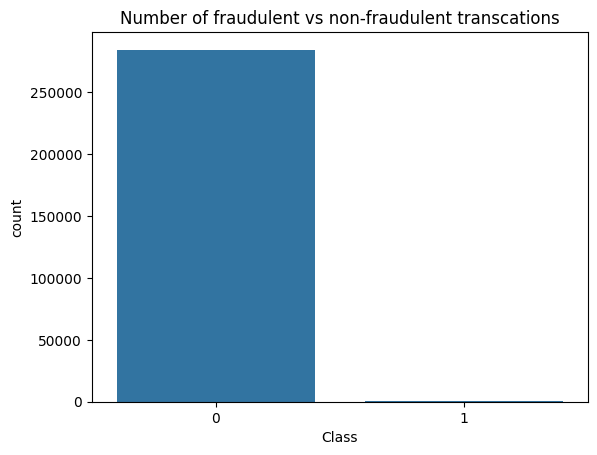

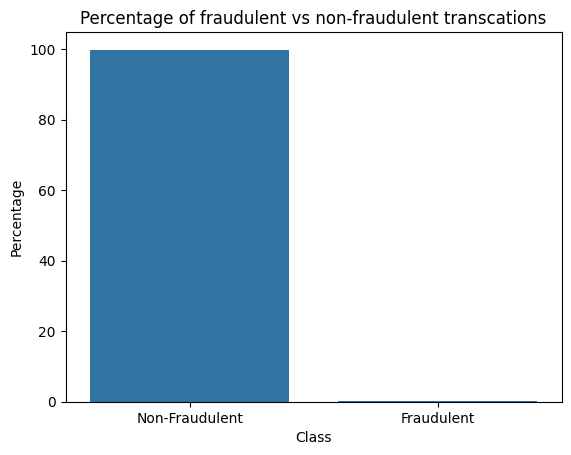

In [10]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data_frame)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_cases_percentage= {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[valid_transactions_share, fraud_transactions_share]}
df_fraud_cases_percentage = pd.DataFrame(fraud_cases_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_cases_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [11]:
# Creating dataframe for fraudulent transactions
fraudulent_transactions= data_frame[data_frame['Class'] == 1]

# Creating dataframe for non-fraudulent transactions
valid_transactions= data_frame[data_frame['Class'] == 0]

Analyze the time distribution

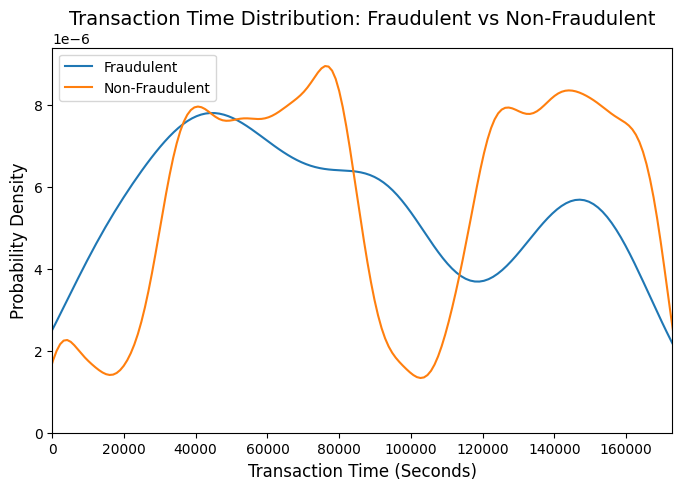

In [13]:
# Distribution plot
plt.figure(figsize=(8, 5))

# Plot for fraudulent transactions
sns.kdeplot(data=fraudulent_transactions['Time'], label='Fraudulent', fill=False)

# Plot for non-fraudulent transactions
sns.kdeplot(data=valid_transactions['Time'], label='Non-Fraudulent', fill=False)


plt.xlim(0, max(fraudulent_transactions['Time'].max(), valid_transactions['Time'].max()))

# Adding labels and title
plt.xlabel('Transaction Time (Seconds)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Transaction Time Distribution: Fraudulent vs Non-Fraudulent', fontsize=14)
plt.legend()

# Display the plot
plt.show()

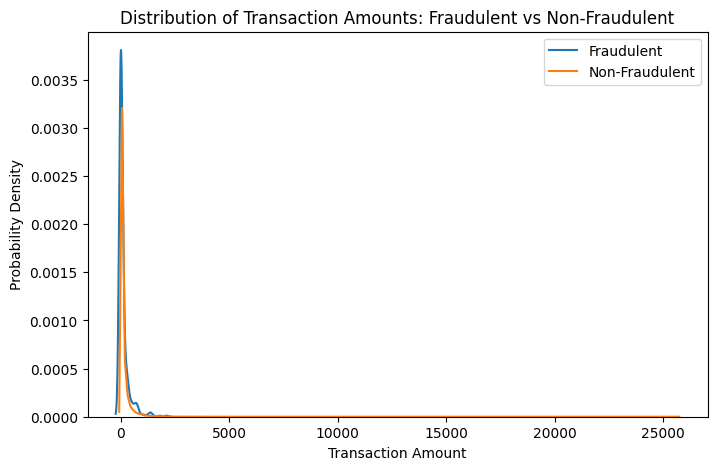

In [17]:
# Distribution plot
plt.figure(figsize=(8, 5))

# Plot for fraudulent transaction amounts
fraudulent_amount_plot = sns.kdeplot(data=fraudulent_transactions['Amount'], label='Fraudulent', fill=False)

# Plot for non-fraudulent transaction amounts
non_fraudulent_amount_plot = sns.kdeplot(data=valid_transactions['Amount'], label='Non-Fraudulent', fill=False)

# Adding labels and title
fraudulent_amount_plot.set(xlabel='Transaction Amount', ylabel='Probability Density')
plt.title('Distribution of Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.legend()

# Display the plot
plt.show()

Compute the correlation matrix

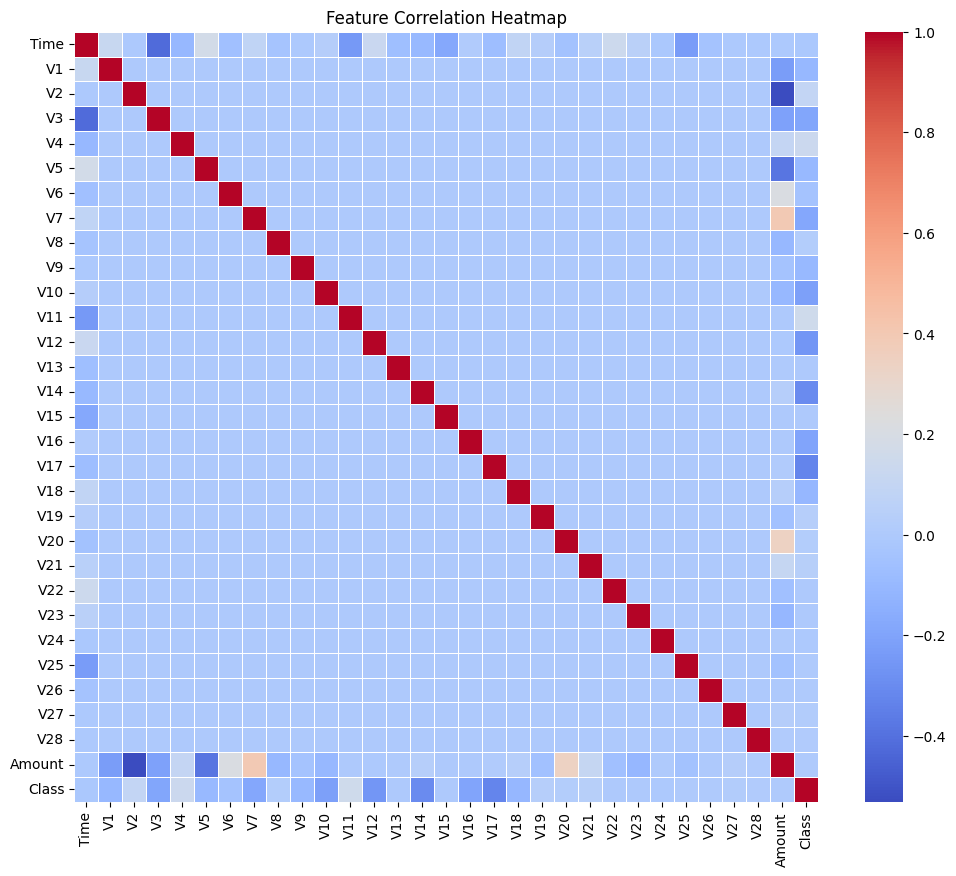

In [14]:
# Compute the correlation matrix
# This captures the pairwise relationships between numerical features in the dataset
corr_matrix = data_frame.corr()

# Step 4: Visualize the correlation matrix as a heatmap
# The heatmap provides an intuitive view of the strength and direction of correlations
plt.figure(figsize=(12, 10))  # Set the figure size for better readability
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Create heatmap
plt.title("Feature Correlation Heatmap")  # Add a descriptive title
plt.show()

Split into testing and training samples

In [15]:
# Separate features and target/labels
X = data_frame.drop(columns=['Class'])
y = data_frame['Class']

# Split data into training and testing sets using the sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Length of training smaples:',len(X_train))
print('Length of testing smaples:',len(X_test))

Length of training smaples: 227845
Length of testing smaples: 56962


In [17]:
# Listing the columns
all_columns = X_train.columns
all_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

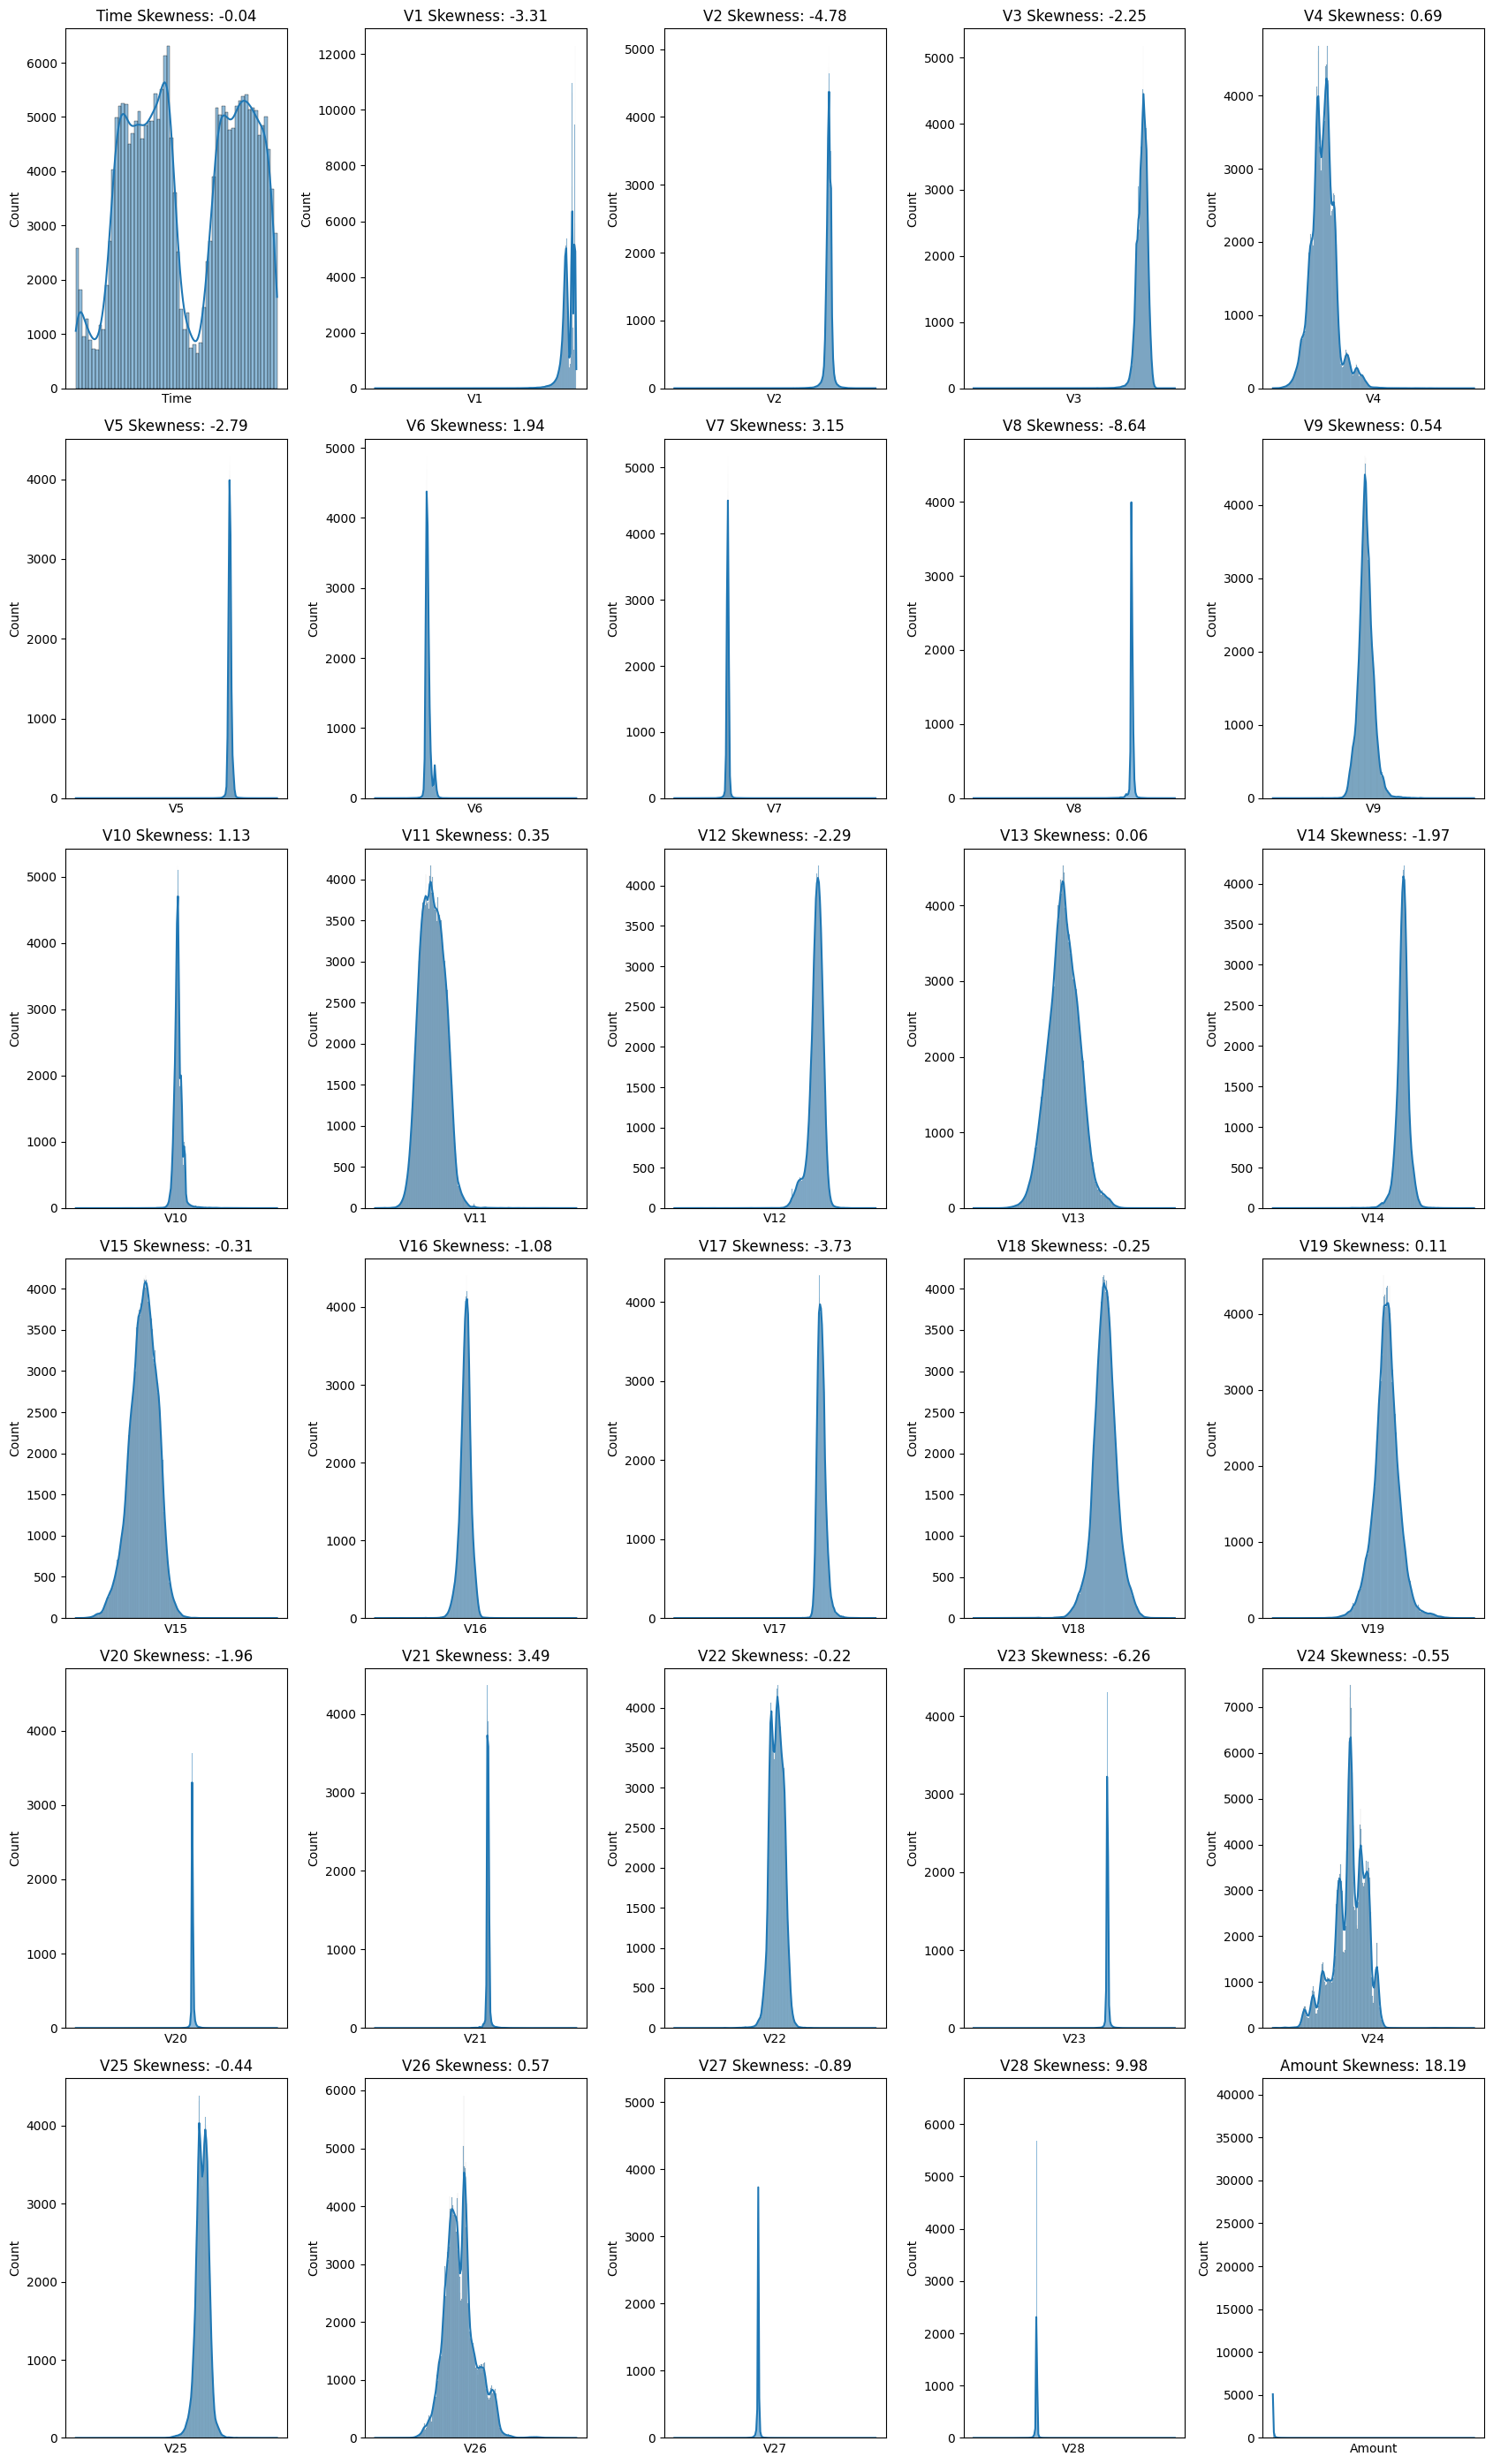

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_counter = 0
plt.figure(figsize=(17, 28))

for column in all_columns:
    plot_counter += 1
    plt.subplot(6, 5, plot_counter)
    sns.histplot(X_train[column], kde=True)
    plt.title(f"{column} Skewness: {X_train[column].skew():.2f}")

    # Remove x-axis labels and ticks
    plt.xticks([])

plt.tight_layout()  # To avoid overlapping of subplots
plt.show()


Make up for class imbalance using SMOTE
Synthetic Minority Oversampling Technique is used to create new samples for any particular class

Here we will use it to create more fraudulent transaction samples

In [19]:
# Initial resampling using SMOTE
desired_samples_class_1 = 90000

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy={1: desired_samples_class_1}, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the number of samples
print("Original training samples:", len(X_train))
print("Synthetic samples generated for class 1:", len(X_train_smote)-len(X_train))
print("Total samples in combined training dataset:", len(X_train_smote))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original training samples: 227845
Synthetic samples generated for class 1: 89606
Total samples in combined training dataset: 317451


Apply Scaling Before Logistic Regression

In [20]:
# Scaling the data
# Logistic regression is sensitive to feature scales, so we use StandardScaler to standardize the data
# StandardScaler scales the data so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit the scaler on the training data and transform it to make the data standardized
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Use the same scaler (already fit on the training data) to transform the test data.
# This ensures that the test data is scaled using the same scaling factors as the training data.
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training data to a DataFrame for display
X_train_scaled_df = pd.DataFrame(X_train_smote_scaled, columns=X_train_smote.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(X_train_scaled_df.head())

# Display the first few rows of the scaled test data
print("\nScaled Test Data:")
print(X_test_scaled_df.head())

Scaled Training Data:
       Time        V1        V2        V3        V4        V5        V6  \
0  1.469387  0.743883 -0.592833  0.139241 -0.707863  0.724083  2.802601   
1  0.688433  0.763657 -0.363237 -0.194550 -0.383609  1.155515  2.343330   
2 -1.048719  0.086572 -0.150468  0.544264 -0.825788  0.026726  1.494374   
3  0.858361  0.819703 -0.836810  0.258286 -1.066667 -0.143463  0.035681   
4 -0.669777  0.208067 -0.677316  0.427471 -1.703620  0.488387  0.163963   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.033928  0.263987  1.118698  ... -0.254227 -0.055741  0.303476  0.366535   
1  0.356557  0.133226  0.413391  ... -0.354051 -0.074939  0.229846  0.054757   
2 -0.126122 -1.472767  0.390042  ...  1.267461 -1.524700  0.103831 -0.485614   
3  0.045212 -0.053672 -0.189970  ... -0.637212 -0.166054  0.069306  0.252520   
4  0.467168 -0.088486  0.366435  ... -0.405678 -0.218983 -0.196495  0.006411   

        V24       V25       V26       V27     

Hyper Parameter Tuning

In [24]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify parameter values
params = {"C": [0.01, 0.1, 1, 10, 100, 1000,10000]}

#Setting the scoring metric to recall
logistic_regression_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

logistic_regression_cv.fit(X_train_smote_scaled, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [25]:
#the results
cv_results = pd.DataFrame(logistic_regression_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.473113,0.490518,0.066493,0.021388,0.01,{'C': 0.01},0.996748,0.997116,0.996835,0.996697,...,0.996856,0.000145,7,0.996889,0.996804,0.996873,0.996904,0.996863,0.996866,0.000034
1,1.260270,0.323851,0.042340,0.015231,0.10,{'C': 0.1},0.997357,0.997593,0.997323,0.997270,...,0.997390,0.000111,6,0.997407,0.997340,0.997415,0.997451,0.997395,0.997402,0.000036
2,1.207076,0.155420,0.046775,0.015411,1.00,{'C': 1},0.997517,0.997695,0.997418,0.997405,...,0.997510,0.000103,5,0.997518,0.997467,0.997527,0.997583,0.997510,0.997521,0.000037
3,2.962484,0.523854,0.110145,0.057386,10.00,{'C': 10},0.997534,0.997713,0.997426,0.997418,...,0.997525,0.000106,4,0.997528,0.997484,0.997538,0.997596,0.997528,0.997535,0.000036
4,1.618995,0.557662,0.049257,0.018055,100.00,{'C': 100},0.997540,0.997714,0.997428,0.997425,...,0.997528,0.000105,3,0.997533,0.997486,0.997540,0.997607,0.997530,0.997539,0.000039
5,1.779409,0.376072,0.063779,0.017902,1000.00,{'C': 1000},0.997540,0.997714,0.997428,0.997545,...,0.997552,0.000092,1,0.997533,0.997486,0.997541,0.997710,0.997530,0.997560,0.000077
6,1.955980,0.620702,0.067368,0.026256,10000.00,{'C': 10000},0.997540,0.997714,0.997428,0.997525,...,0.997548,0.000093,2,0.997533,0.997486,0.997541,0.997695,0.997530,0.997557,0.000072


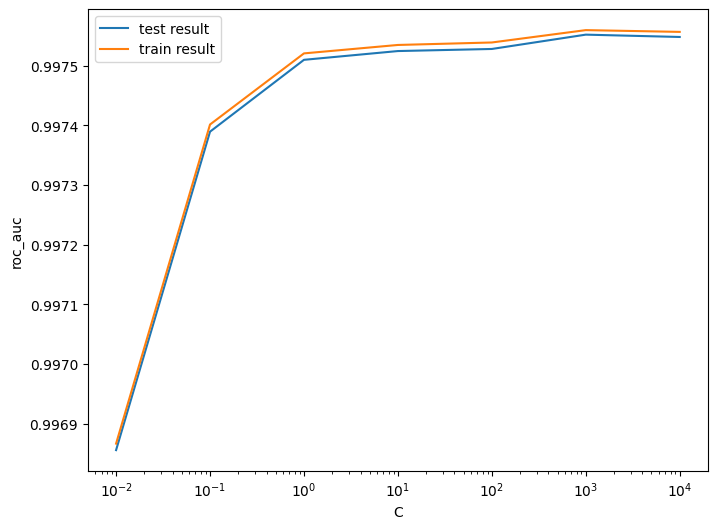

In [26]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [28]:
# Best score with best C
best_score =logistic_regression_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

NameError: name 'model_cv' is not defined


LOGISTIC REGRESSION

In [ ]:
#Initialize the Logistic Regression model
# Here, we are specifying:
# `max_iter=5000`: Allow the model to run up to 5000 iterations (the model is having trouble converging with less iterations than this)
# solver='saga'`: This is an optimization algorithm, particularly good for large datasets or sparse data(so that the model converges with ease)
# `random_state=42`: Ensures reproducibility of results
log_reg = LogisticRegression(max_iter=5000, solver='saga', random_state=42,C=1000)

#Train the Logistic Regression model
# .fit() method trains the model using the scaled training data (X_train_smote_scaled)
history=log_reg.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# .predict_proba() method gives probabilities for each class (0 or 1).
# We're taking probabilities for the positive class (fraudulent transactions) with [:, 1]
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print('done')
